# Problem Set 4: Fixed Income

# Task 1: From Forwards to Interest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# a)

In [2]:
#Load Data
data_FTSE = pd.read_csv(r"Data/PS4 - Data 1-2.csv", delimiter = ";")
print(data_FTSE)
#Define Fixed Values
facevalue = 100
spot = data_FTSE.iloc[0,1]
dvd = 0.0005

    maturity    fwd price
0        0.0  7032.300000
1        1.0  7032.364557
2        1.5  7039.371111
3        2.0  7052.672567
4        2.5  7071.760358
..       ...          ...
75      38.0  8089.151613
76      38.5  8098.356967
77      39.0  8111.142600
78      39.5  8127.045765
79      40.0  8145.539599

[80 rows x 2 columns]


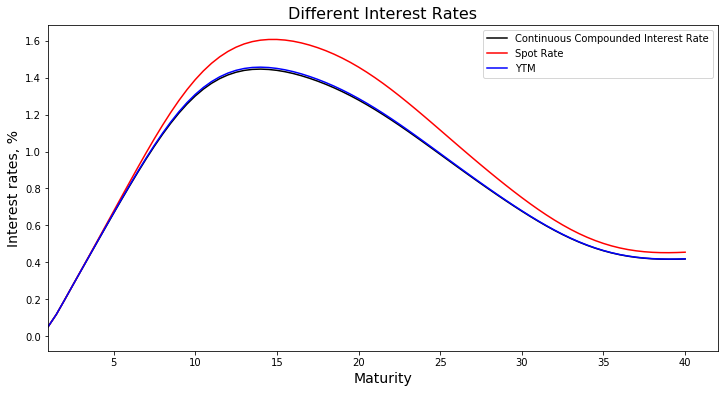

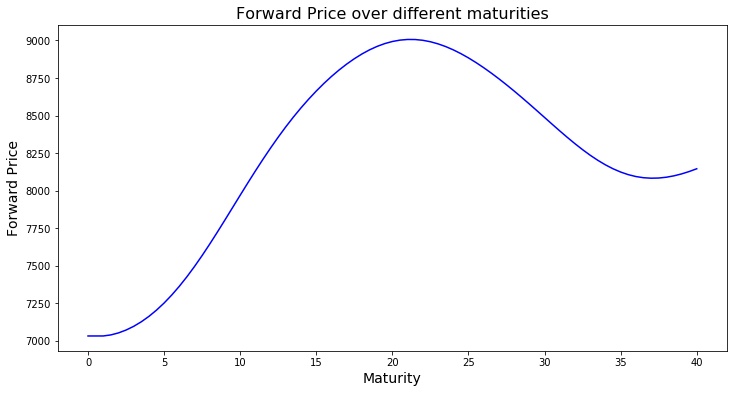

In [3]:
# (i) continuously compounded interest rate
# exp(-my)*F = S*exp(-mdelta) (15.7)
#y = ln(F/S)/m + delta

for column in data_FTSE:
    y = (np.log(data_FTSE['fwd price']/spot) / data_FTSE['maturity']) + dvd
data_FTSE['Cont Comp Int Rate'] = y

# (ii) Effective Interest rate (YTM)
# YTM = (((F/S)*exp(m*delta))**(1/m)) - 1

for column in data_FTSE:
    ytm = (((data_FTSE['fwd price']/spot)*np.exp(data_FTSE['maturity']*dvd))**(1/data_FTSE['maturity'])) - 1
data_FTSE['YTM'] = ytm

# (iii) Effective spot interest rate 
for column in data_FTSE:
    Y = (((data_FTSE['fwd price']/spot)*np.exp(data_FTSE['maturity']*dvd))-1)/data_FTSE['maturity']
data_FTSE['Spot Rate'] = Y

plt.figure(figsize = (12,6))
plt.plot(data_FTSE['maturity'], data_FTSE['Cont Comp Int Rate']*100, color ='black', label = 'Continuous Compounded Interest Rate')
plt.plot(data_FTSE['maturity'], data_FTSE['Spot Rate']*100, color = 'red', label = 'Spot Rate')
plt.plot(data_FTSE['maturity'], data_FTSE['YTM']*100, color = 'blue', label = 'YTM')
plt.xlim(xmin=1)
plt.legend(loc='best')

plt.title('Different Interest Rates', size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Interest rates, %', size = 14)

plt.show()


plt.figure(figsize = (12,6))
plt.plot(data_FTSE['maturity'], data_FTSE['fwd price'], color = 'blue')
plt.title('Forward Price over different maturities', size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Forward Price', size = 14)
plt.show()

# b)

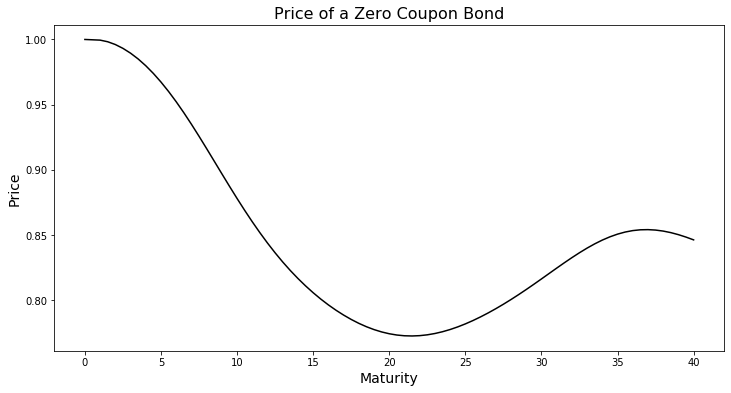

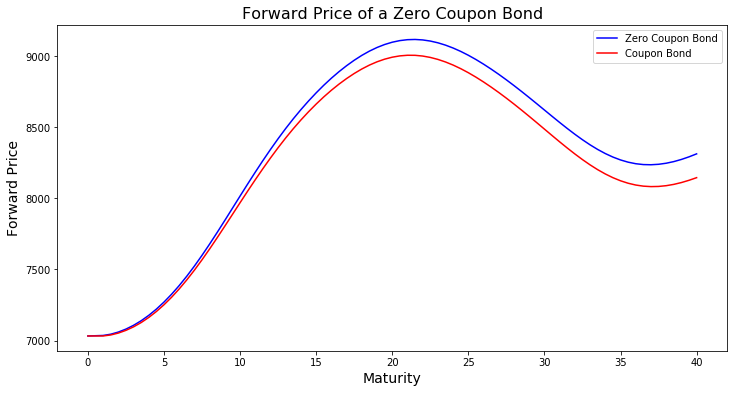

In [4]:
# Zeo Coupon Prices
# B(m) = (1+Y(m))**-m (16.2)
for column in data_FTSE:
    B = ((1+data_FTSE['YTM']))**-data_FTSE['maturity']
data_FTSE['Zero Coupon Bond Price'] = B

plt.figure(figsize = (12,6))
plt.plot(data_FTSE['maturity'], data_FTSE['Zero Coupon Bond Price'], color='black')
plt.title("Price of a Zero Coupon Bond", size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Price', size = 14)
plt.show()

#and the Forward Price
#FWD_Zero = exp(my)S
FWD_Zero = (np.exp(data_FTSE['maturity']*data_FTSE['YTM']))*spot
data_FTSE['fwd price zero coupon'] = FWD_Zero

plt.figure(figsize = (12,6))
plt.plot(data_FTSE['maturity'], data_FTSE['fwd price zero coupon'], color='blue', label='Zero Coupon Bond')
plt.plot(data_FTSE['maturity'], data_FTSE['fwd price'], color='red', label='Coupon Bond')
plt.title("Forward Price of a Zero Coupon Bond", size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Forward Price', size = 14)
plt.legend(loc='best')
plt.show()

# c)

In [5]:
#Forward Rate of a contract entering in 3y and selling in 20y
# FWR = (((1+Y(n))**(n((n-m)))) / ((1+Y(m))**(m/n-m))) - 1 (16.15)
#m=3, n=20
# FWR = ((1+Y(20)**(20/17))/(1+Y(17))**(3/17))-1

Y_20 = data_FTSE.iloc[39, 3]
Y_3 = data_FTSE.iloc[5, 3]
nominator = (1+Y_20)**(20/17)
denominator = (1+Y_3)**(3/17)

FWR = (nominator/denominator) - 1
print("The forward rate of a contract entering in 3 years and selling in 20 years is: " + str(round(FWR, 3)))

The forward rate of a contract entering in 3 years and selling in 20 years is: 0.015


# Task 2: Bond Price, Yield-to-Maturity and Duration

# a)

In [6]:
#Formula (16.17)
#Calculation of first part of Sum

c=1
m = 40
def odd_count(n):
    return list(range(1,n+1, 2))
v1_2a = odd_count(78) #Create vector with uneven numbers

price = []
for i in v1_2a:
    value = (c/((1+data_FTSE.iloc[i, 4])**data_FTSE.iloc[i, 0]))
    price.append(value)
   
sum1_2b = sum(price)

sum2_2b = 100/((1+data_FTSE.iloc[79, 4])**data_FTSE.iloc[79, 0])

bond_price = sum1_2b + sum2_2b
print("The price of the bond is: " + str(round(bond_price, 3)))

The price of the bond is: 115.95


# b)

In [7]:
#Approx YTM = 2((c+(1-P)(K)))/(1+P) (Remark 16.26)

# YTM_2b = 2*(1+(100-bond_price)/m)/(100+bond_price)
YTM_2b= 2*(0.01+(1-bond_price/100)/m)/(1+bond_price/100)
print("The YTM is: " + str(round(YTM_2b, 5)) + f" ({str(round(YTM_2b*100, 2))}%)")

The YTM is: 0.00557 (0.56%)


# c)

In [8]:
price2c = []
face_value_2c = []
v1_2c = odd_count(80)
c = 0.01

for i in v1_2c:
    value2c = data_FTSE.iloc[i, 0]*(c/((1+YTM_2b)**data_FTSE.iloc[i, 0]))
    price2c.append(value2c)
    # FV = data_FTSE.iloc[i, 0]*(100/((1+YTM_2b)**(data_FTSE.iloc[i, 0])))
    # face_value_2c.append(FV)

# sum1_2c = sum(price2c) + face_value_2c[39]
sum1_2c = sum(price2c)
Dollar_Dur = 1/(1+YTM_2b)*sum1_2c #Formula 17.1
Adj_Dur = Dollar_Dur / (bond_price/100) #Formula 17.6
# Adj_Dur = Dollar_Dur / (bond_price) #Formula 17.6
Macaulay_Dur = Dollar_Dur*(1+YTM_2b) / (bond_price/100) #Formula 17.8
# Macaulay_Dur = Dollar_Dur*(1+YTM_2b) / (bond_price) #Formula 17.8

print("Results rounded to three digits:")
print("--------------------------------")
print("The Dollar Duration is: " + str(round(Dollar_Dur, 3)))
print("The Adjusted Duration is: " + str(round(Adj_Dur, 3)))
print("The Macaulay Duration is: " + str(round(Macaulay_Dur, 3)))

Results rounded to three digits:
--------------------------------
The Dollar Duration is: 7.029
The Adjusted Duration is: 6.062
The Macaulay Duration is: 6.096


### d)

In [9]:
data_FTSE_adj = data_FTSE[['maturity', 'Spot Rate']]
for i in data_FTSE_adj.index:
    data_FTSE_adj.loc[i, 'Spot Rate (1)'] = data_FTSE_adj.loc[i, 'Spot Rate'] + 0.005
    data_FTSE_adj.loc[i, 'Spot Rate (2)'] = data_FTSE_adj.loc[i, 'Spot Rate'] - 0.005
    data_FTSE_adj.loc[i, 'Spot Rate (3)'] = data_FTSE_adj.loc[i, 'Spot Rate'] * 1.3
    data_FTSE_adj.loc[i, 'Spot Rate (4)'] = data_FTSE_adj.loc[i, 'Spot Rate'] * 0.3 + (data_FTSE_adj.loc[i, 'maturity'] / 4000)  
print(data_FTSE_adj)

    maturity  Spot Rate  Spot Rate (1)  Spot Rate (2)  Spot Rate (3)  \
0        0.0        NaN            NaN            NaN            NaN   
1        1.0   0.000509       0.005509      -0.004491       0.000662   
2        1.5   0.001171       0.006171      -0.003829       0.001522   
3        2.0   0.001950       0.006950      -0.003050       0.002535   
4        2.5   0.002748       0.007748      -0.002252       0.003572   
..       ...        ...            ...            ...            ...   
75      38.0   0.004536       0.009536      -0.000464       0.005896   
76      38.5   0.004519       0.009519      -0.000481       0.005875   
77      39.0   0.004516       0.009516      -0.000484       0.005871   
78      39.5   0.004525       0.009525      -0.000475       0.005882   
79      40.0   0.004543       0.009543      -0.000457       0.005905   

    Spot Rate (4)  
0             NaN  
1        0.000403  
2        0.000726  
3        0.001085  
4        0.001449  
..            .

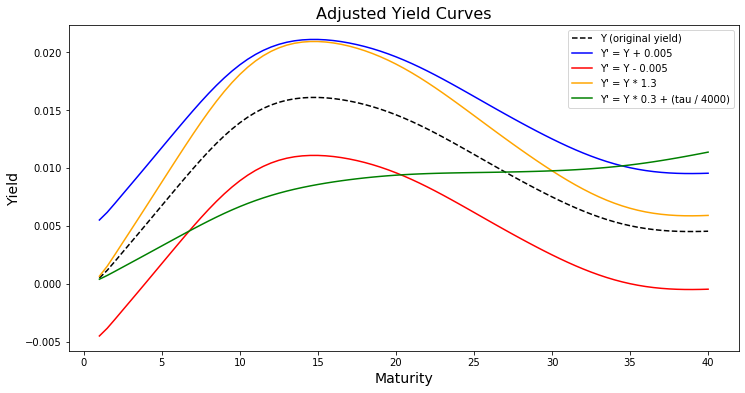

In [10]:
plt.figure(figsize = (12,6))
plt.plot(data_FTSE_adj['maturity'], data_FTSE_adj['Spot Rate'], linestyle='dashed', color = 'black', label = "Y (original yield)")
plt.plot(data_FTSE_adj['maturity'], data_FTSE_adj['Spot Rate (1)'], color = 'blue', label = "Y' = Y + 0.005")
plt.plot(data_FTSE_adj['maturity'], data_FTSE_adj['Spot Rate (2)'], color = 'red', label = "Y' = Y - 0.005")
plt.plot(data_FTSE_adj['maturity'], data_FTSE_adj['Spot Rate (3)'], color = 'orange', label = "Y' = Y * 1.3")
plt.plot(data_FTSE_adj['maturity'], data_FTSE_adj['Spot Rate (4)'], color = 'green', label = "Y' = Y * 0.3 + (tau / 4000)")
plt.title("Adjusted Yield Curves", size = 16)
plt.xlabel('Maturity', size = 14)
plt.ylabel('Yield', size = 14)
plt.legend()
plt.show()

### e)

In [11]:
prices_ytms = pd.DataFrame(index = ['Spot Rate (1)', 'Spot Rate (2)', 'Spot Rate (3)', 'Spot Rate (4)'], columns = ['Price', 'YTM'])
for j in range(1, 5):
    c=1
    m = 40
    def odd_count(n):
        return list(range(1,n+1, 2))
    v1_2a = odd_count(78)

    price = []
    for i in v1_2a:
        value = (c/((1+data_FTSE_adj.loc[i, f'Spot Rate ({j})'])**data_FTSE.iloc[i, 0]))
        price.append(value)

    sum1_2b = sum(price)

    sum2_2b = 100/((1+data_FTSE_adj.loc[79, f'Spot Rate ({j})'])**data_FTSE.iloc[79, 0])

    bond_price = sum1_2b + sum2_2b
    YTM = 2*(1+(100-bond_price)/m)/(100+bond_price)
    
    prices_ytms.loc[f'Spot Rate ({j})', 'Price'] = bond_price
    prices_ytms.loc[f'Spot Rate ({j})', 'YTM'] = YTM

prices_ytms    

,Price,YTM
Spot Rate (1),98.00151,0.010606
Spot Rate (2),137.725946,0.000478
Spot Rate (3),109.886897,0.007174
Spot Rate (4),96.258536,0.011144


### f)

In [30]:
prices_approx = []

for i in range(0, 4):
    if i == 0:
        ytm_old = YTM_2b
        ytm_new = prices_ytms.loc[f"Spot Rate ({i+1})", "YTM"]
        ytm_change = ytm_new - ytm_old
        price_change = -Dollar_Dur * (ytm_change/(1+ytm_new))
        price_approx = 100 * (1+price_change)
        prices_approx.append(price_approx)
    else:
        ytm_old = prices_ytms.loc[f"Spot Rate ({i})", "YTM"]
        ytm_new = prices_ytms.loc[f"Spot Rate ({i+1})", "YTM"]
        ytm_change = ytm_new - ytm_old
        price_change = -Dollar_Dur * (ytm_change/(1+ytm_new))
        price_approx = prices_approx[i-1] * (1+price_change)
        prices_approx.append(price_approx)

prices_ytms.loc[:, 'Price (approx)'] = prices_approx
prices_ytms = prices_ytms[['YTM', 'Price', 'Price (approx)']]

prices_ytms

,YTM,Price,Price (approx)
Spot Rate (1),0.010606,98.00151,96.496371
Spot Rate (2),0.000478,137.725946,103.362341
Spot Rate (3),0.007174,109.886897,98.532460
Spot Rate (4),0.011144,96.258536,95.813004


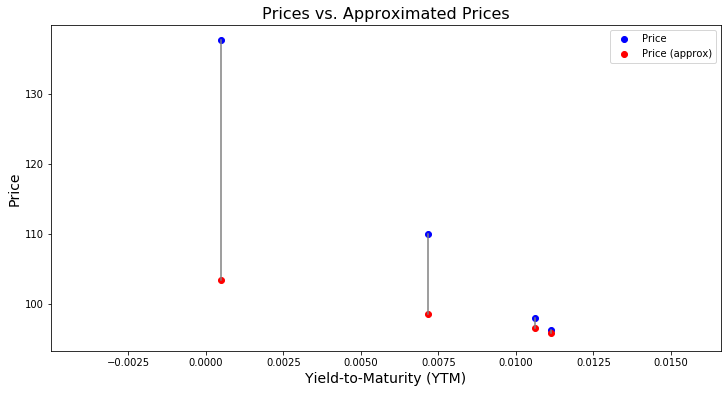

In [34]:
plt.figure(figsize = (12,6))
plt.scatter(prices_ytms['YTM'], prices_ytms['Price'], marker = 'o', color = 'blue', label = 'Price')
plt.scatter(prices_ytms['YTM'], prices_ytms['Price (approx)'], marker = 'o', color = 'red', label = 'Price (approx)')
for i in range(1, 5):
    x = [prices_ytms.loc[f'Spot Rate ({i})', 'YTM'], prices_ytms.loc[f'Spot Rate ({i})', 'YTM']]
    y = [prices_ytms.loc[f'Spot Rate ({i})', 'Price'], prices_ytms.loc[f'Spot Rate ({i})', 'Price (approx)']]
    plt.plot(x, y, color = 'grey')
plt.title("Prices vs. Approximated Prices", size = 16)
plt.xlabel('Yield-to-Maturity (YTM)', size = 14)
plt.ylabel('Price', size = 14)
plt.legend()
plt.show()